# 体重データ分析

In [1]:
import pandas as pd
import datetime
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
WEIGHTS_PATH = "../data/all_weights.csv"
CALORIES_PATH = "../data/all_calories.csv"
weights = pd.read_csv(WEIGHTS_PATH, index_col='date', parse_dates=True)
calories= pd.read_csv(CALORIES_PATH, index_col='date', parse_dates=True)
len(weights), len(calories)

(115, 75)

In [3]:
weights = weights.groupby('date').mean()

In [4]:
df = pd.merge(weights, calories, how="outer", on="date").sort_values("date")
len(df)

75

## データ分析

In [5]:
df["year"] = df.index.year
df["month"] = df.index.month
df["week_of_month"] = df.index.week
df["year_and_wom"] = df.index.strftime('%Y-W%W')

### 直近2週間

In [6]:
df_recent = pd.DataFrame()

In [7]:
df_recent["体重"] = round(df["weight"], 1)
df_recent["BMI"] = round(df["bmi"], 1)
df_recent["消費カロリー"] = df["calory"]
df_recent["摂取カロリー"] = df["calory_in"]
df_recent["運動カロリー"] = df["calory_activity"]

In [8]:
df_recent.tail(14)

,体重,BMI,消費カロリー,摂取カロリー,運動カロリー
date,,,,,
2020-02-01,95.0,32.5,4886,876,3472
2020-02-02,94.1,32.2,4972,876,3694
2020-02-03,95.4,32.6,1870,0,0
2020-02-04,95.3,32.6,4805,1301,3435
2020-02-05,93.9,32.1,3739,906,2253
2020-02-06,95.2,32.6,2601,1648,871
2020-02-07,95.2,32.6,1580,1443,0
2020-02-09,94.0,32.2,4365,993,2968
2020-02-10,94.2,32.2,4394,1963,3016


### 週別の集計

In [9]:
groupby = df.groupby('year_and_wom')

In [10]:
df_by_week = pd.DataFrame()
df_by_week["体重"] = round(groupby["weight"].mean(), 1)
df_by_week["BMI"] = round(groupby["bmi"].mean(), 1)

In [11]:
df_by_week["消費カロリー"] = round(groupby["calory"].mean(), 1) * 7
df_by_week["摂取カロリー"] = round(groupby["calory_in"].mean(), 1) * 7
df_by_week["カロリー増減"] = (round(groupby["calory_in"].mean(), 1) - round(groupby["calory"].mean(), 1)) * 7
df_by_week["運動カロリー"] = round(groupby["calory_activity"].mean(), 1) * 7

In [12]:
df_by_week["増減"] = df_by_week.diff()["体重"]
df_by_week["総減量"] = 106 - df_by_week["体重"]

In [13]:
df_by_week["週番号"] = df_by_week.index
df_by_week["date"] = df_by_week["週番号"].apply(lambda x: datetime.datetime.strptime(x + '-0', "%Y-W%W-%w"))
df_by_week.set_index("date", inplace=True)

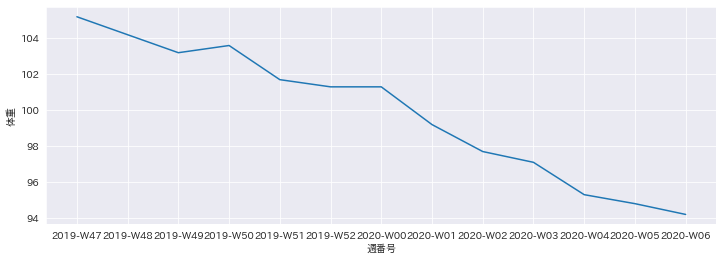

In [14]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df_by_week, x='週番号', y='体重')

In [15]:
df_by_week.drop(["週番号"], axis=1, inplace=True)
df_by_week.index.name = '週別'

In [16]:
df_by_week = df_by_week.groupby("週別").mean()

In [17]:
df_by_week.tail(8)

,体重,BMI,消費カロリー,摂取カロリー,カロリー増減,運動カロリー,増減,総減量
週別,,,,,,,,
2019-12-29,101.7,34.7,27458.90,0.0,-27458.90,15866.9,-1.9,4.3
2020-01-05,101.3,34.6,21579.25,0.0,-21579.25,9462.6,-0.2,4.7
2020-01-12,99.2,33.9,25256.00,1057.0,-24199.00,14153.3,-2.1,6.8
2020-01-19,97.7,33.4,28797.30,7693.0,-21104.30,18718.7,-1.5,8.3
2020-01-26,97.1,33.2,26156.90,8806.0,-17350.90,15303.4,-0.6,8.9
2020-02-02,95.3,32.6,26576.20,6472.2,-20104.00,15955.8,-1.8,10.7
2020-02-09,94.8,32.4,22120.00,7339.5,-14780.50,11114.6,-0.5,11.2
2020-02-16,94.2,32.2,23944.90,7551.6,-16393.30,13111.0,-0.6,11.8
